<a href="https://colab.research.google.com/github/aditipriya25/Cyber_attack_classifier/blob/main/Classifier_on_cic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link to download : Dataset is publicly available at http://www.unb.ca/cic/datasets/IDS2017.html

Importing the Dataset1 and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [2]:
df = pd.read_csv("/content/02-14-2018.csv")

In [3]:
df.head(3)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign


Data Preprocessing

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.loc[:, 'Label'].unique()

array(['Benign', 'FTP-BruteForce', nan], dtype=object)

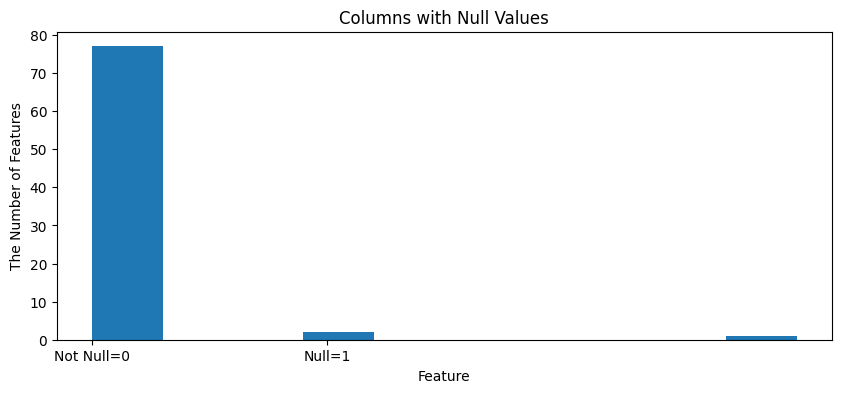

In [ ]:
plt.figure(1,figsize=(10,4))
plt.hist( df.isna().sum())
plt.xticks([0,1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The Number of Features')
plt.show()

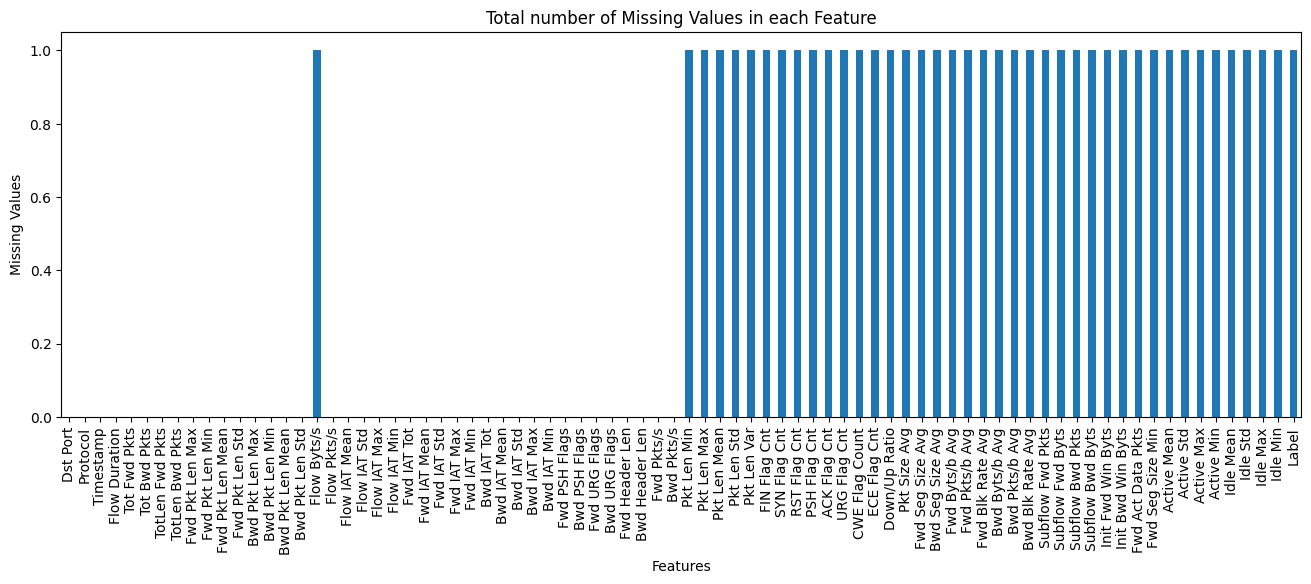

In [6]:
def plotMissingValues(df):
  missing_values = df.isnull().sum()
  fig = plt.figure(figsize=(16,5))
  missing_values.plot.bar()
  plt.xlabel("Features")
  plt.ylabel("Missing Values")
  plt.title("Total number of Missing Values in each Feature")
  plt.show()
plotMissingValues(df)

In [7]:
data_f = df.dropna()

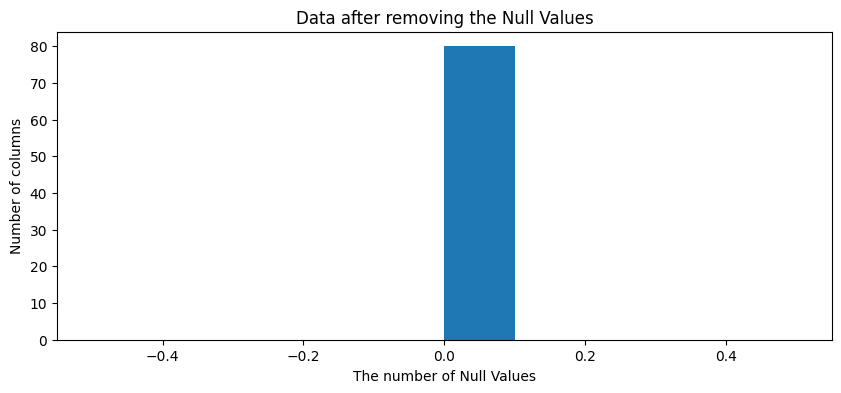

In [8]:
plt.figure(1, figsize=(10,4))
plt.hist(data_f.isna().sum())
plt.title('Data after removing the Null Values')
plt.xlabel('The number of Null Values')
plt.ylabel('Number of columns')
plt.show()

In [9]:
pd.set_option('use_inf_as_na', True)
null_values = data_f.isnull().sum()

<ipython-input-9-93426a7dbfd9>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [10]:
(data_f.dtypes == 'object')

,0
Dst Port,False
Protocol,False
Timestamp,True
Flow Duration,False
Tot Fwd Pkts,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [11]:
data_f['Label'] = data_f['Label'].map({'Benign' :0, 'FTP-BruteForce':1})

<ipython-input-11-f9234dc18e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'Benign' :0, 'FTP-BruteForce':1})


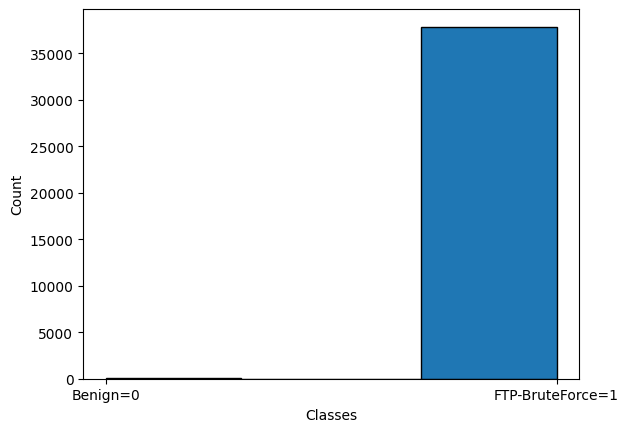

In [12]:
plt.hist(data_f['Label'], bins=[0,0.3,0.7,1], edgecolor='black')
plt.xticks([0,1], labels=['Benign=0', 'FTP-BruteForce=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

Data Exploring

In [13]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,37949.000000,37949.000000,3.794900e+04,37949.000000,37949.000000,37949.000000,37949.000000,37949.000000,37949.000000,37949.000000,...,37948.000000,37948.000000,3.794800e+04,37948.0,3.794800e+04,3.794800e+04,3.794800e+04,37948.000000,3.794800e+04,3.794800e+04
mean,22.079291,5.992938,1.583437e+05,1.012490,1.005982,0.920894,0.992912,0.407916,0.033308,0.126880,...,0.005956,39.930537,5.329354e+02,0.0,5.329354e+02,5.329354e+02,7.905194e+04,0.166528,7.905206e+04,7.905183e+04
std,102.301829,0.249068,4.185751e+06,0.555739,0.491995,53.323116,35.593337,14.102719,3.097337,6.201225,...,0.516843,1.554831,9.495372e+04,0.0,9.495372e+04,9.495372e+04,2.103194e+06,6.610449,2.103197e+06,2.103190e+06
min,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,21.000000,6.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,21.000000,6.000000,2.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,21.000000,6.000000,2.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
max,9984.000000,17.000000,1.126422e+08,91.000000,83.000000,7680.000000,2302.000000,1168.000000,300.000000,697.600000,...,90.000000,40.000000,1.840791e+07,0.0,1.840791e+07,1.840791e+07,5.632109e+07,775.696139,5.632164e+07,5.632076e+07


Plot the featue distribution:

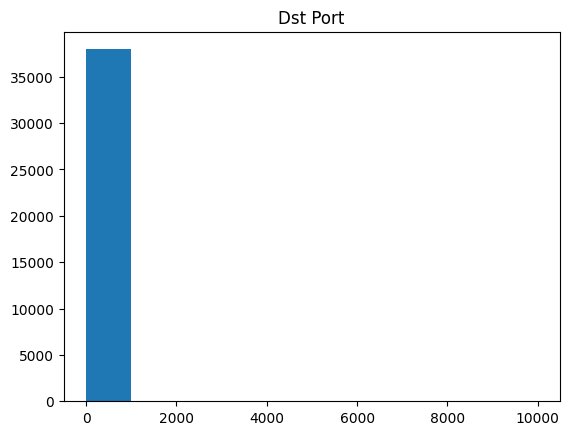

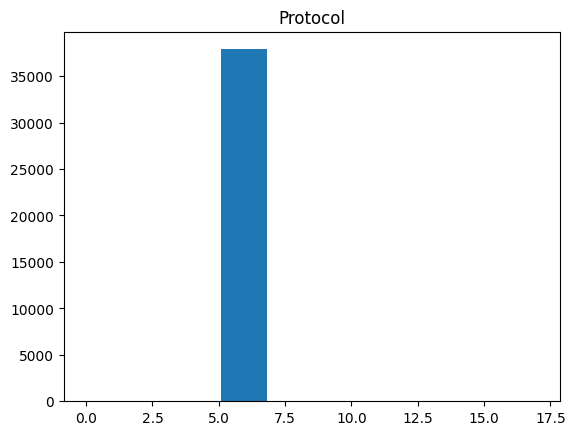

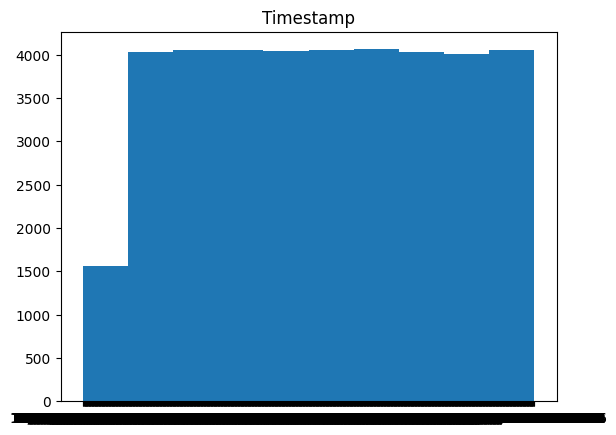

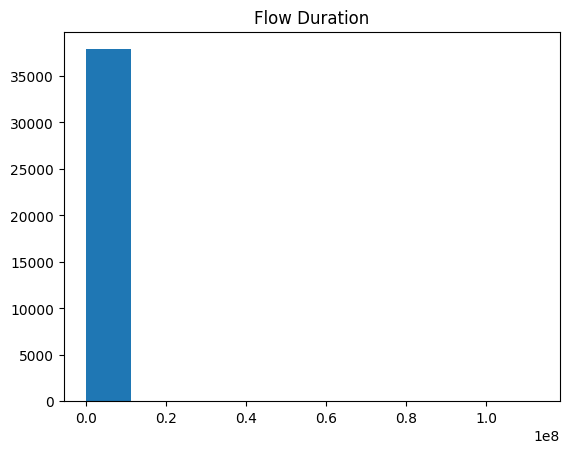

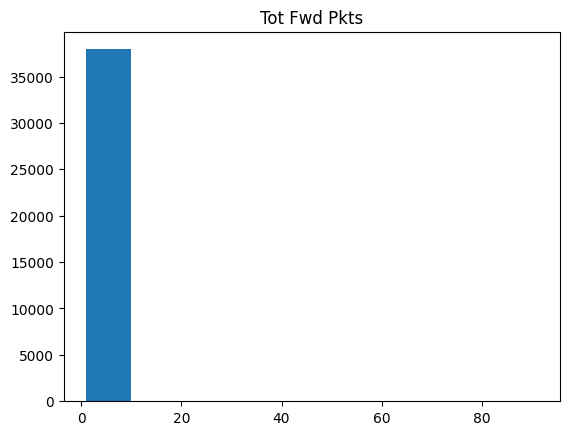

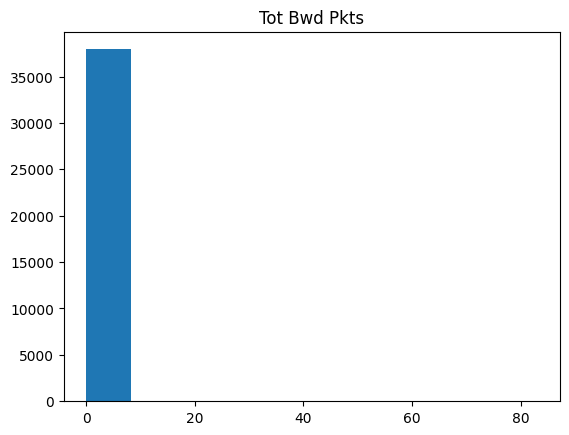

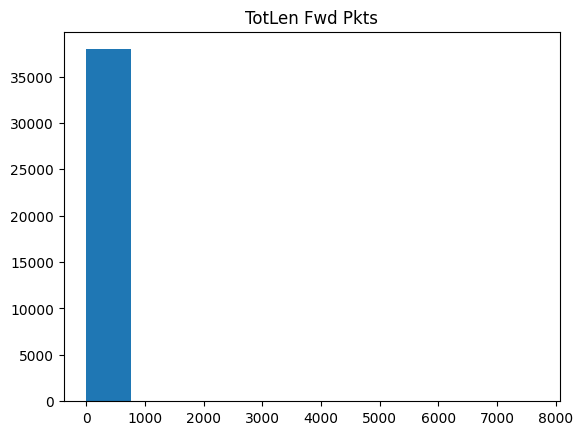

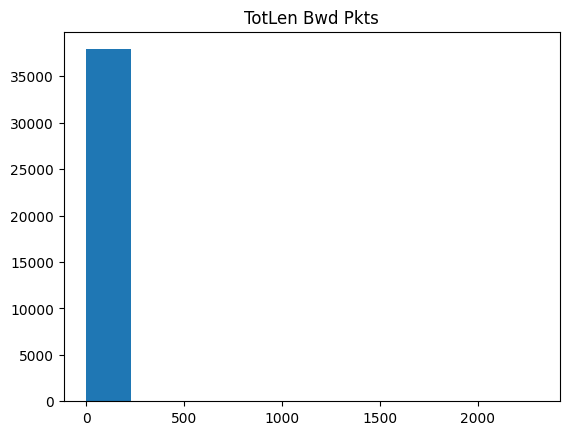

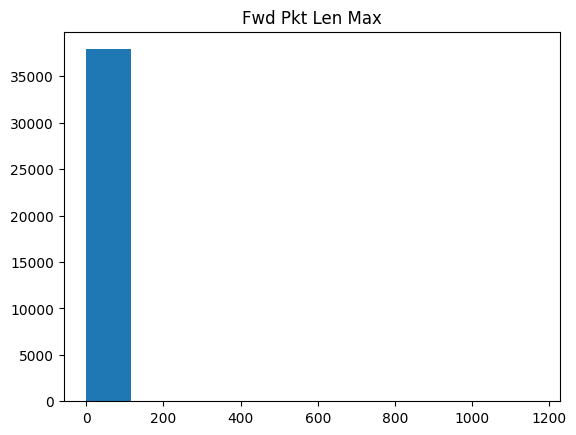

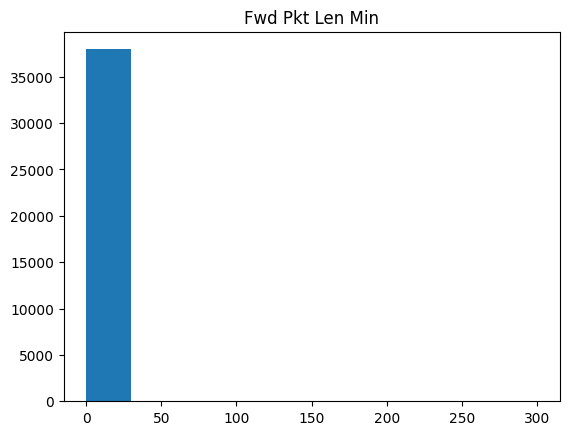

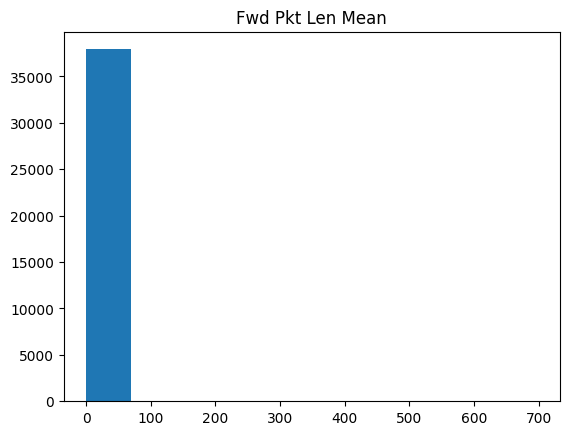

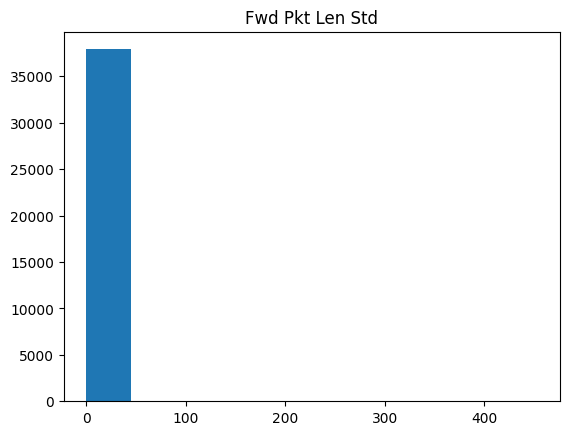

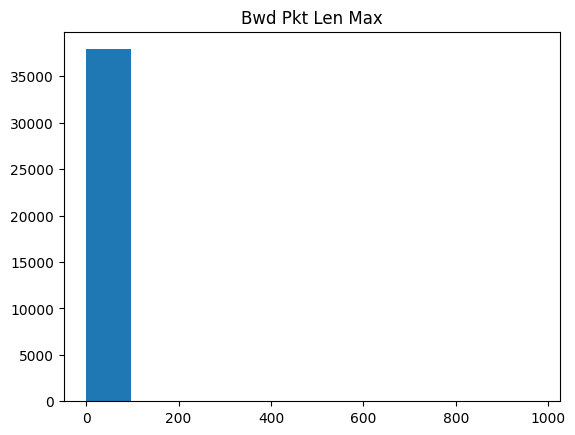

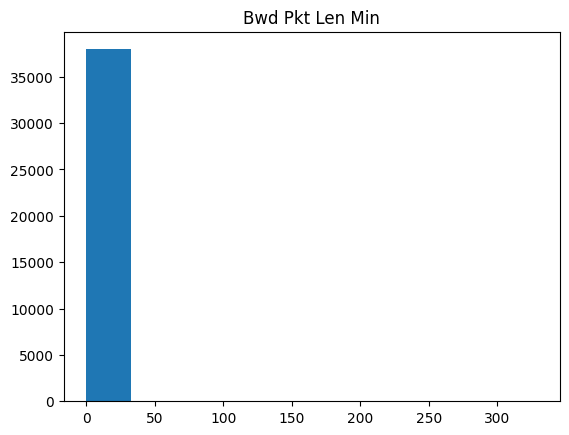

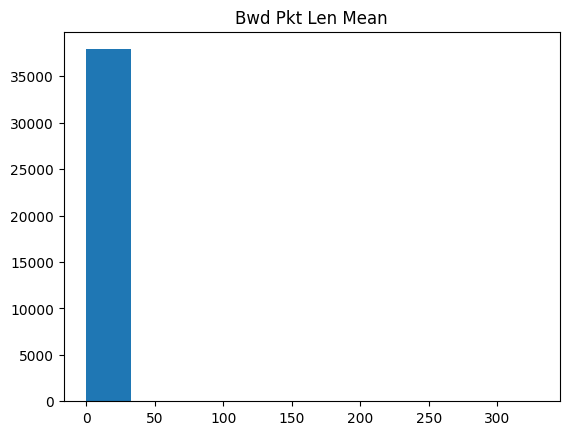

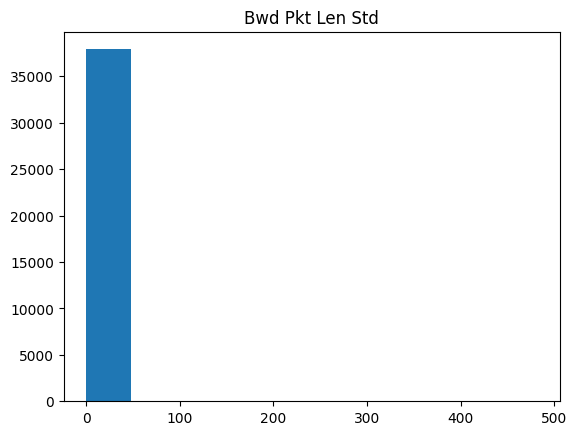

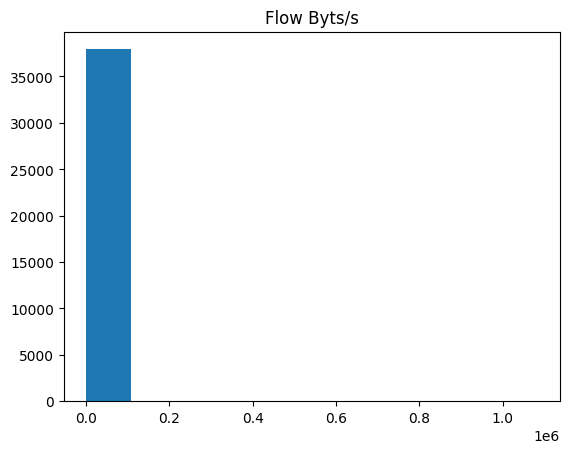

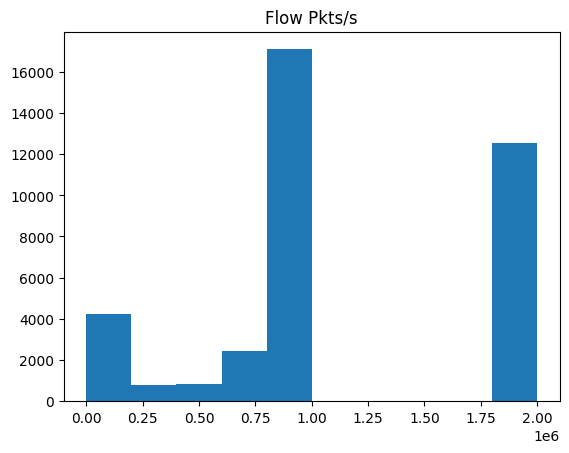

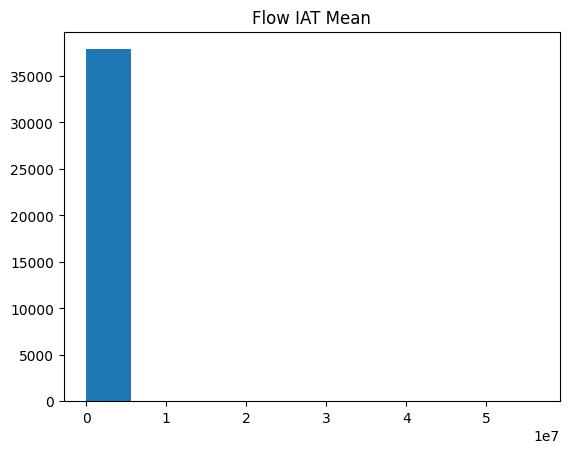

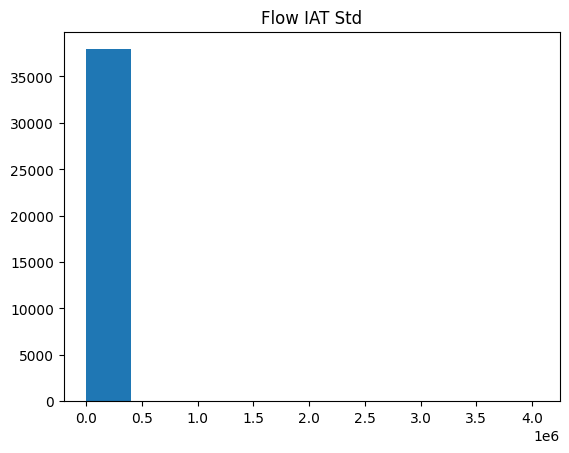

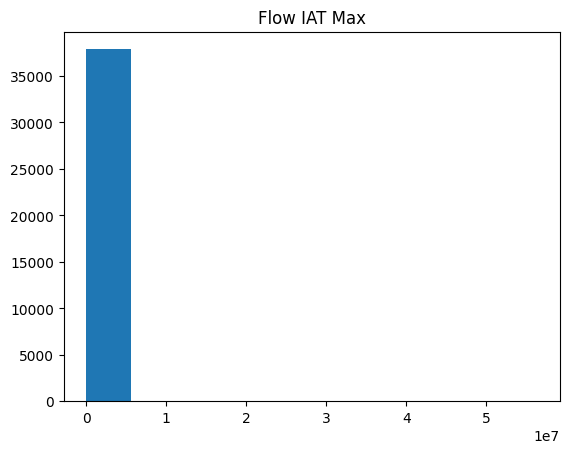

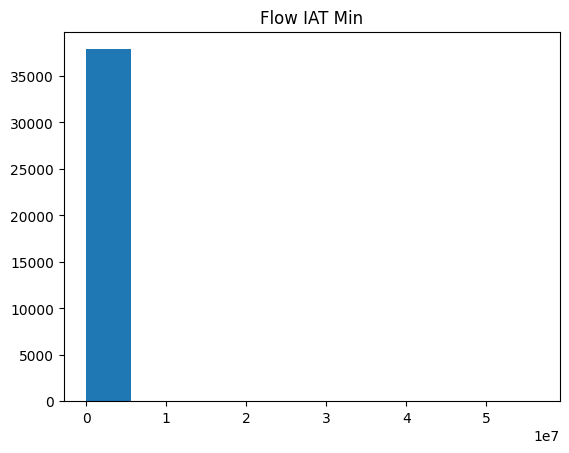

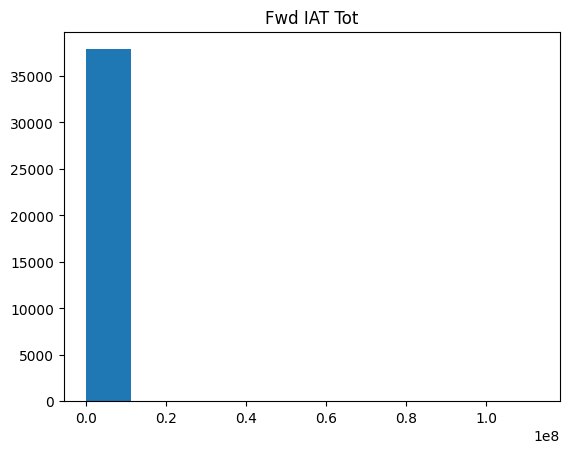

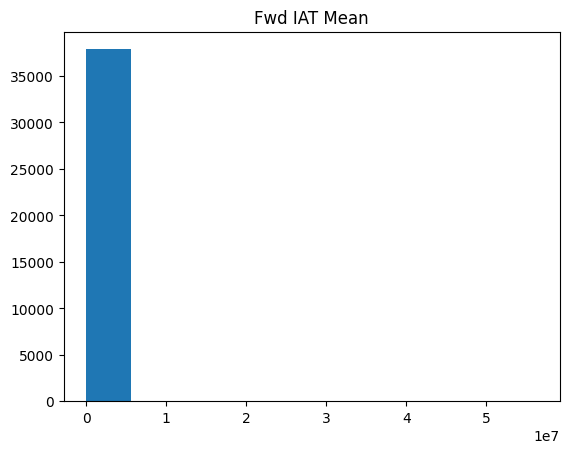

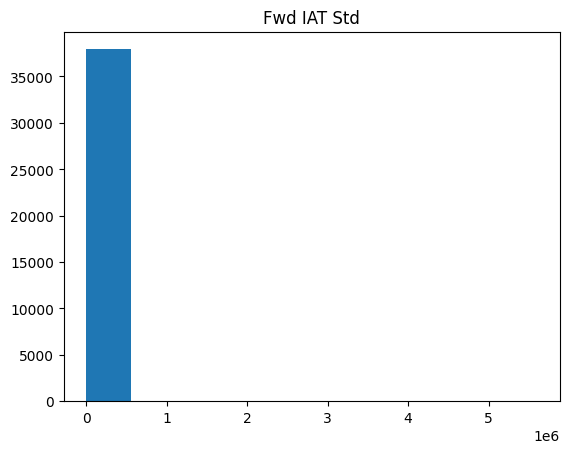

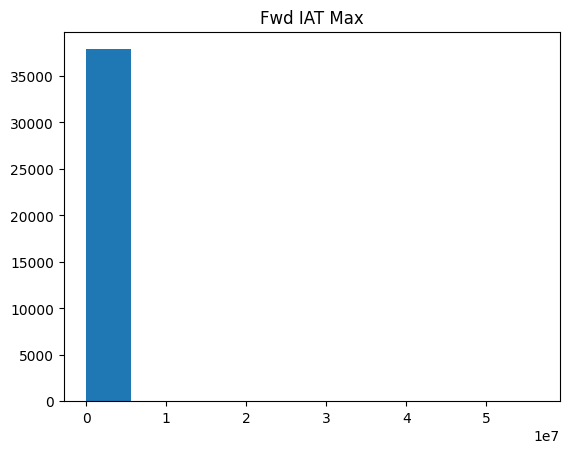

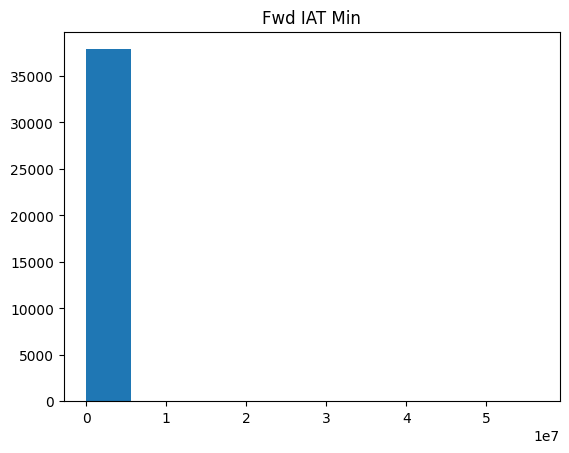

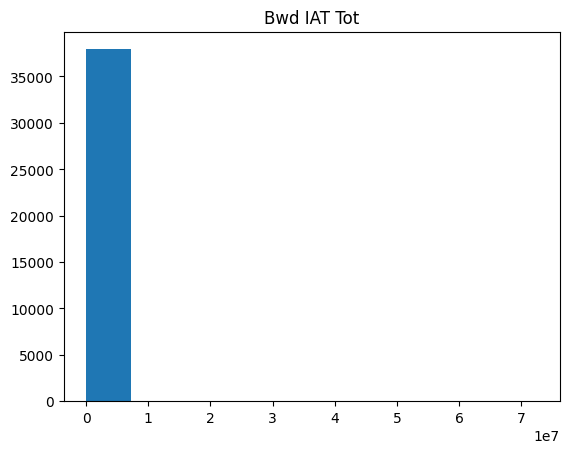

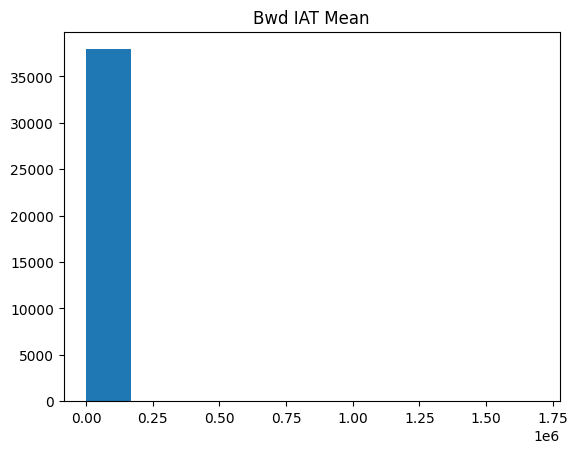

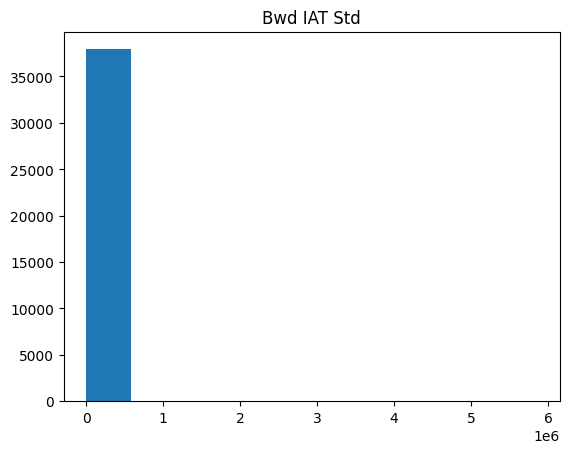

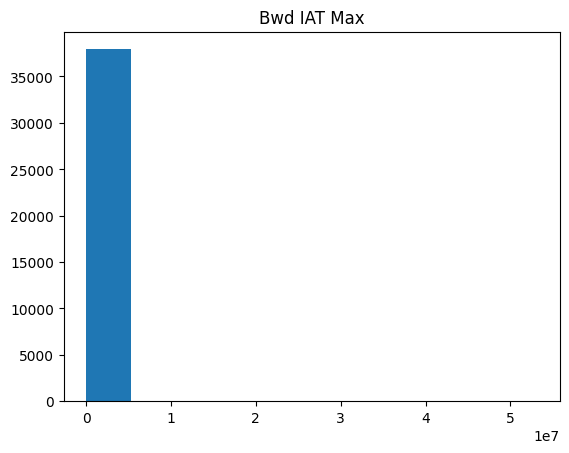

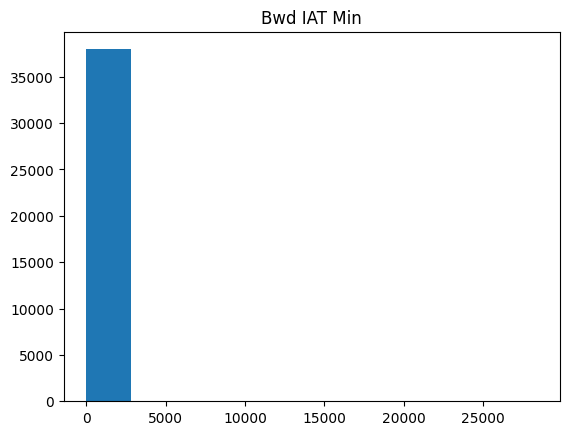

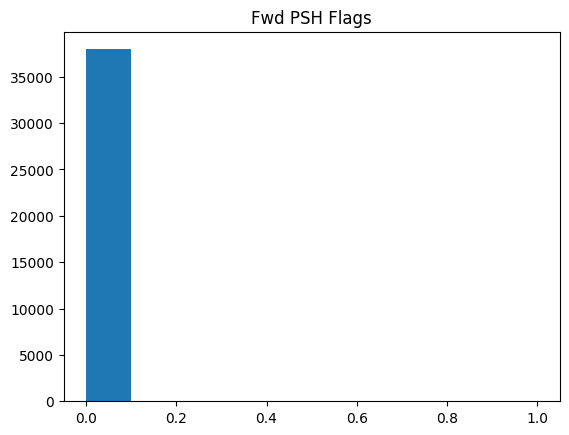

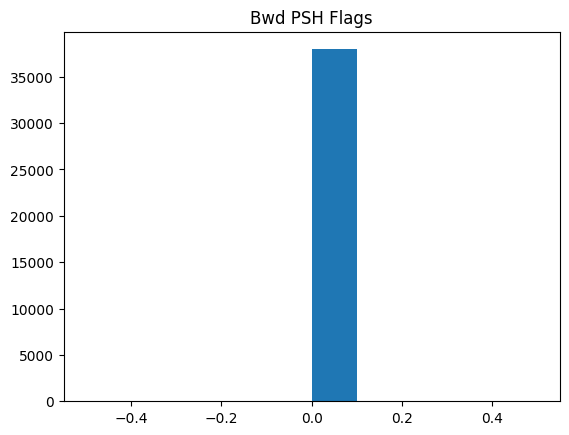

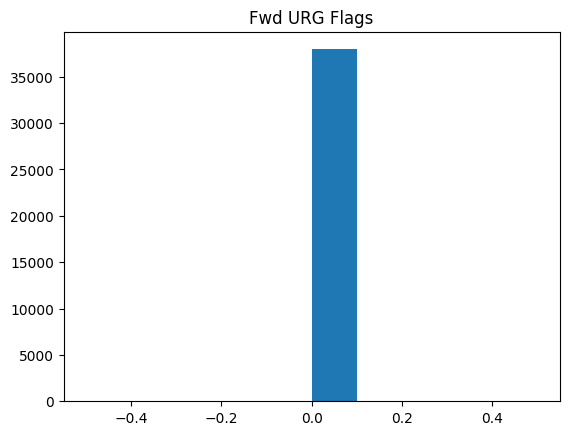

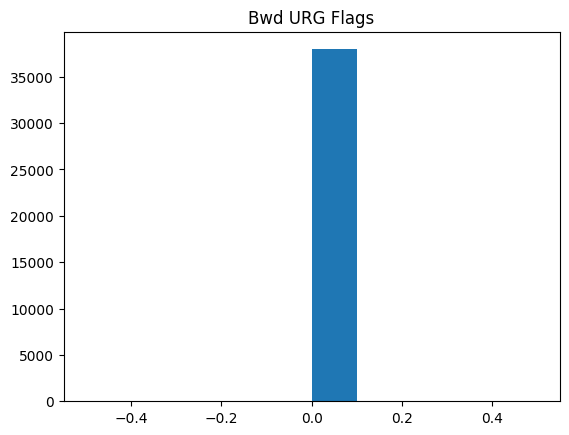

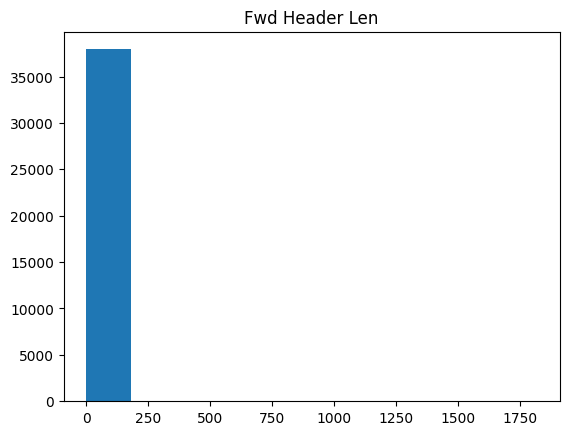

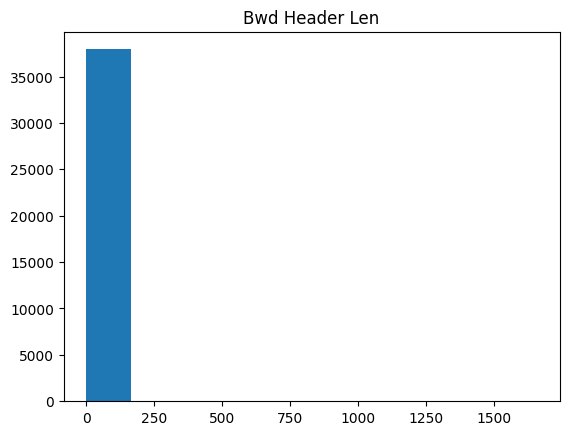

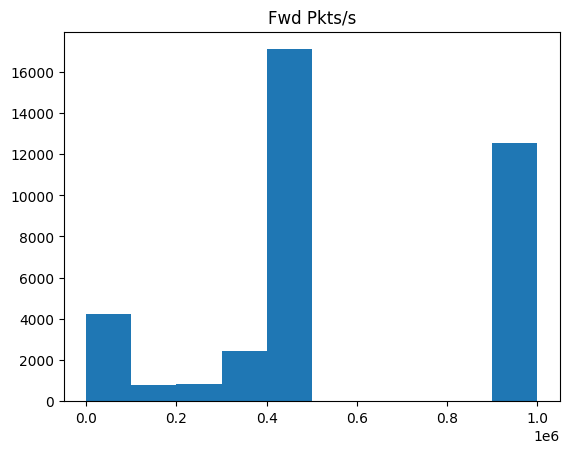

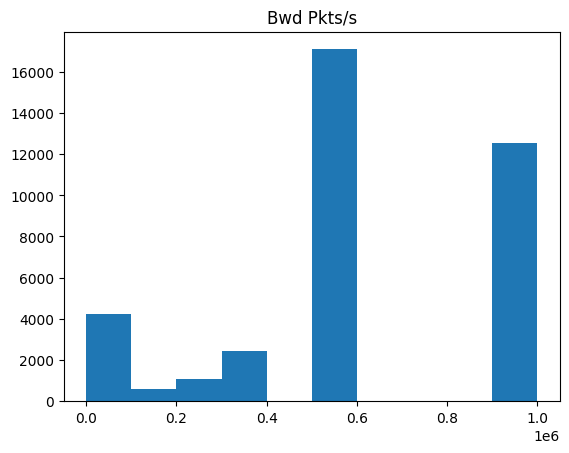

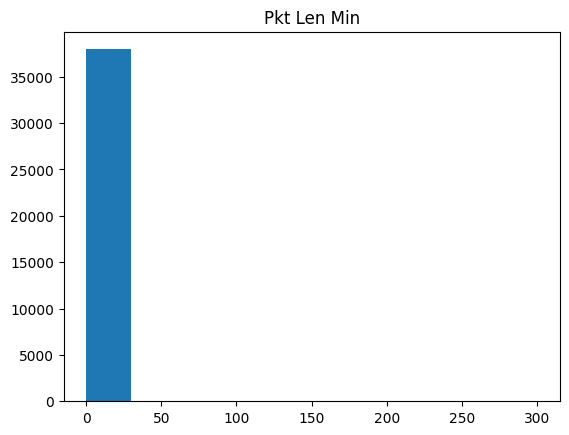

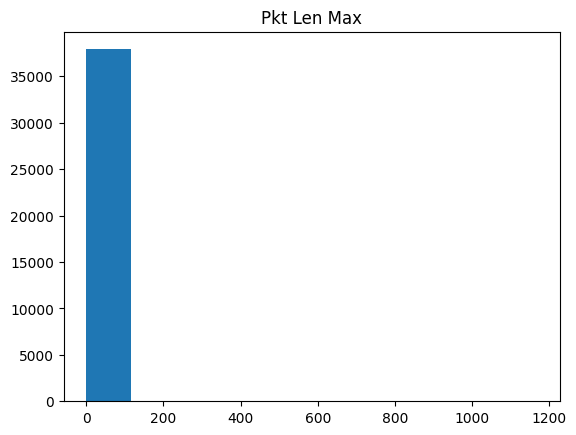

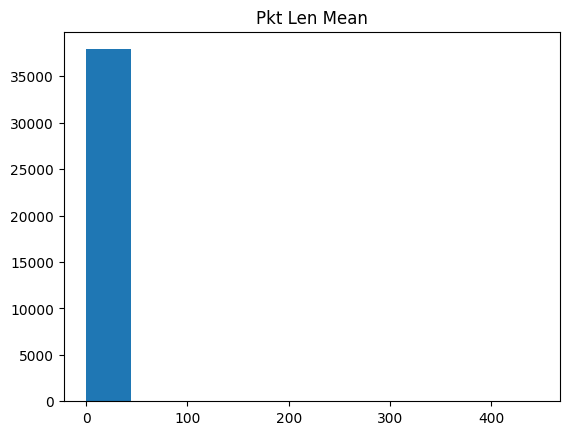

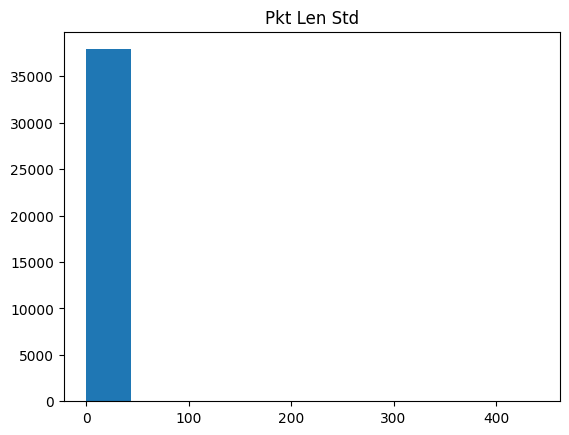

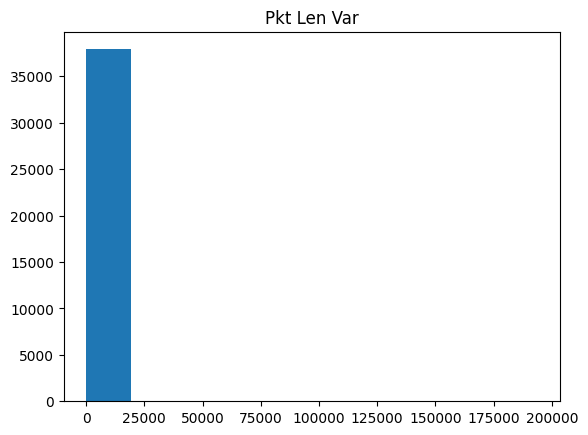

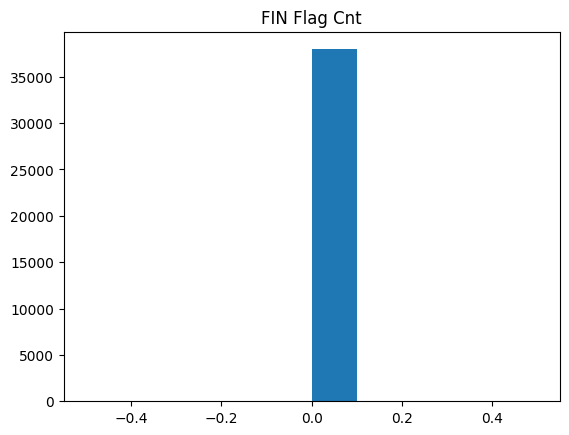

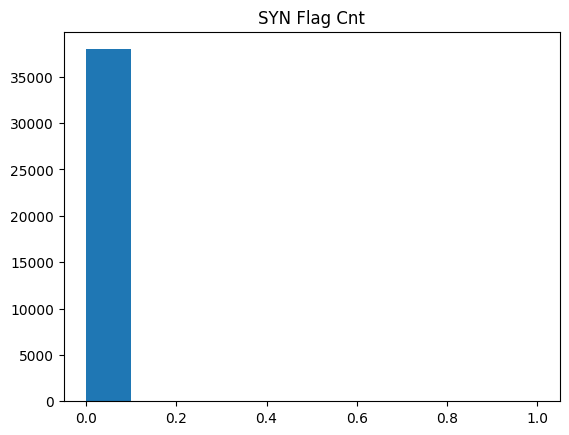

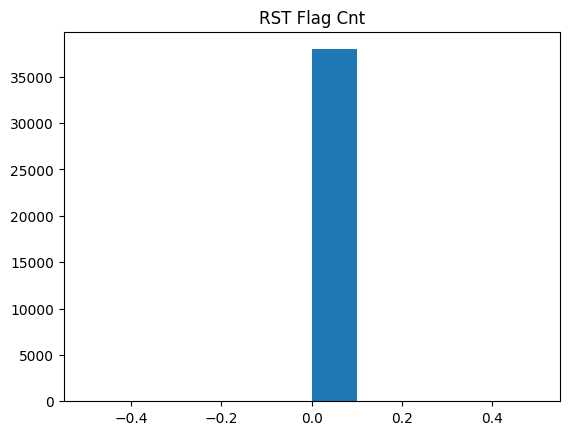

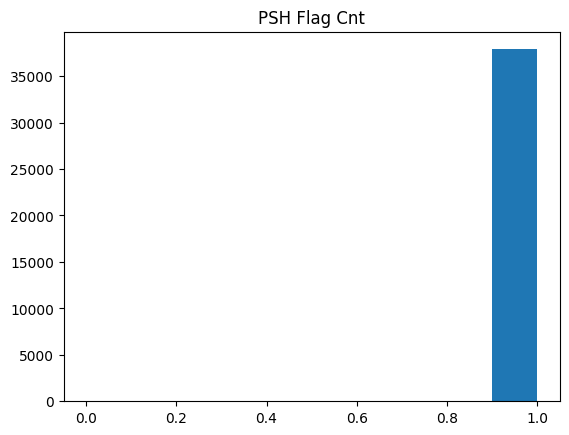

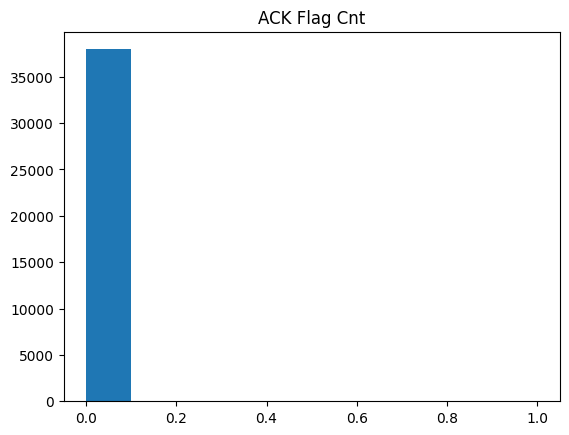

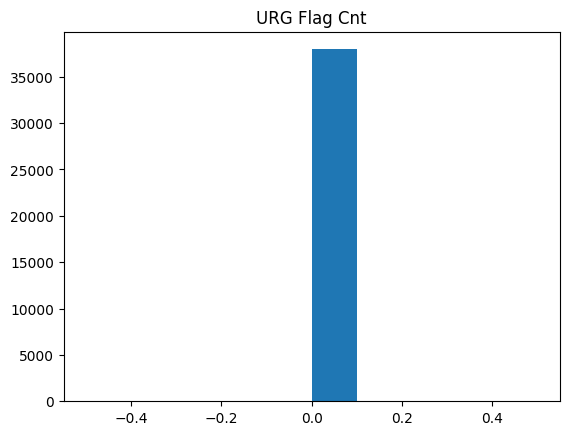

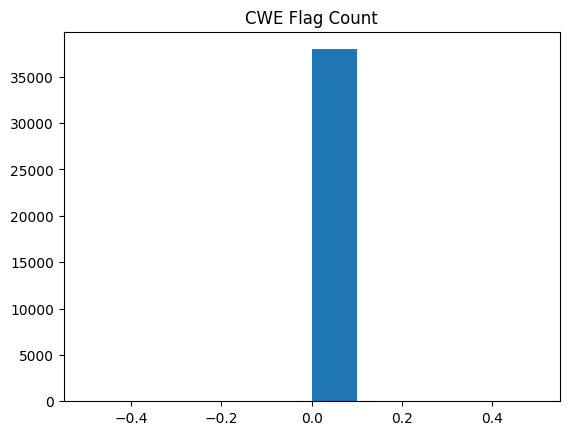

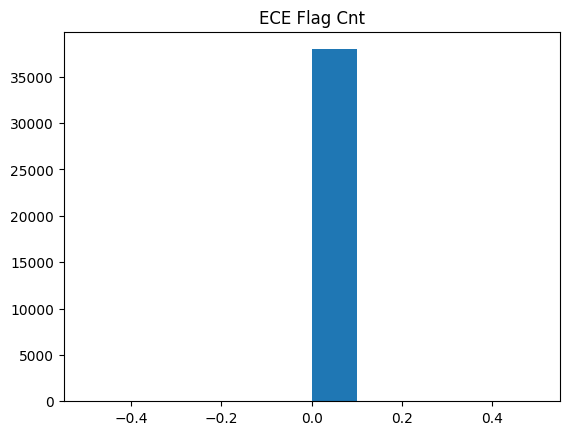

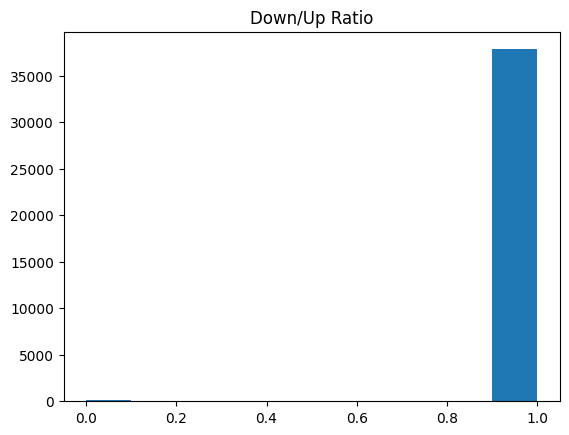

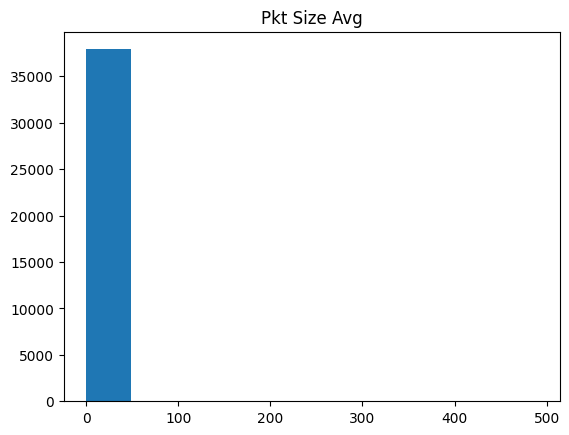

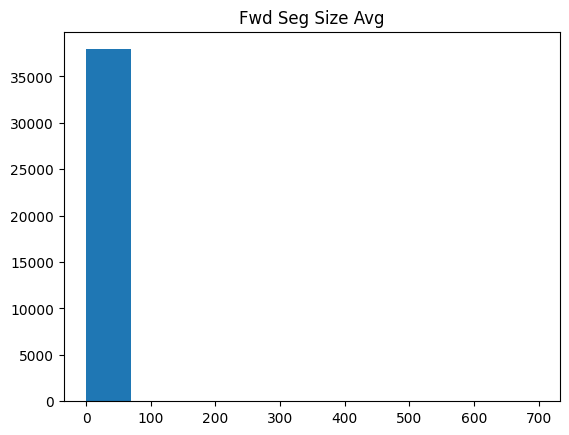

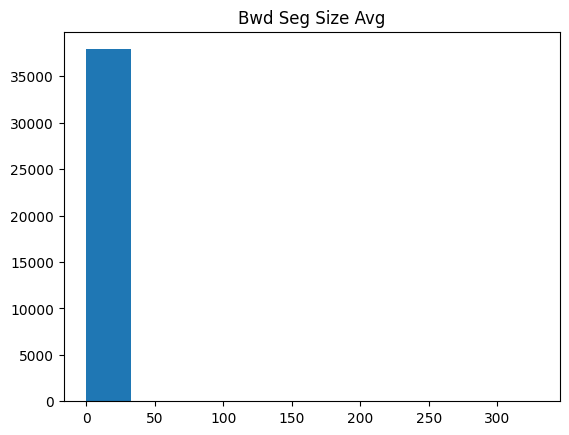

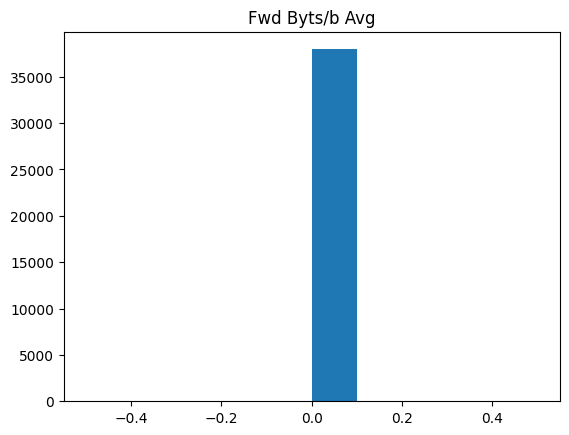

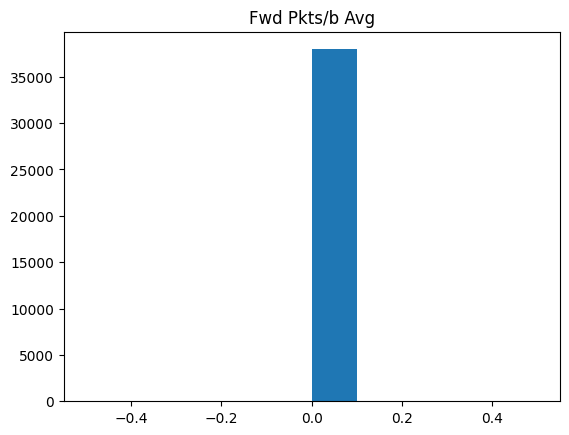

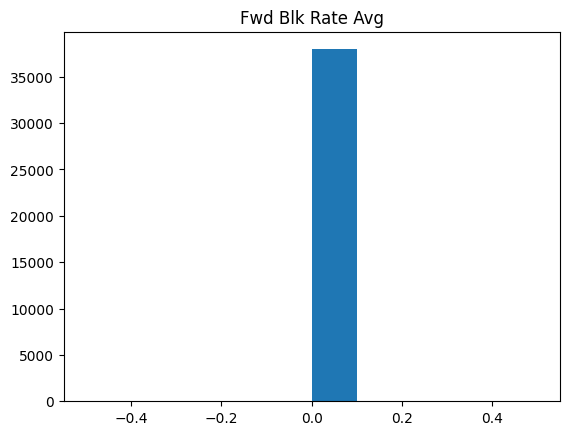

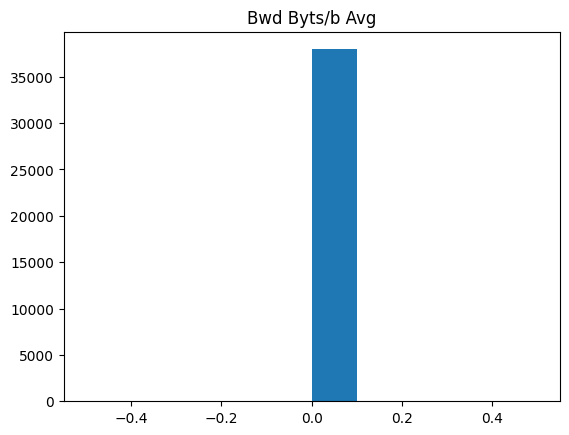

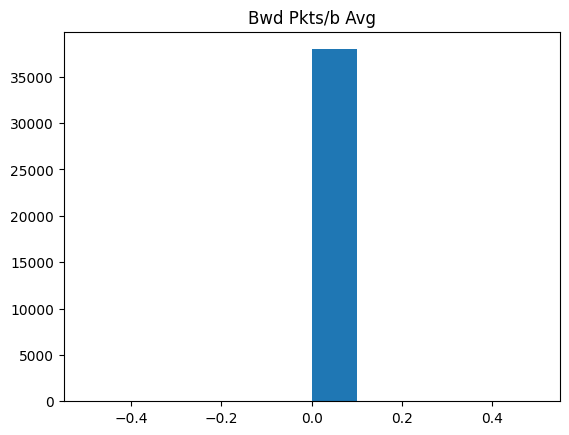

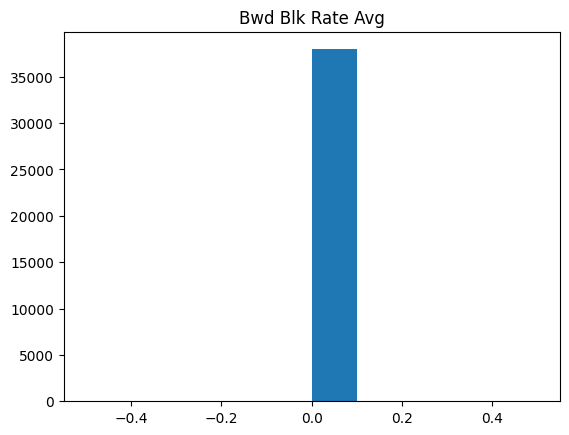

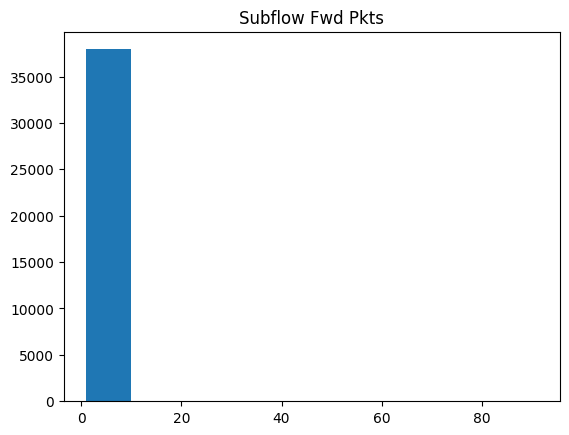

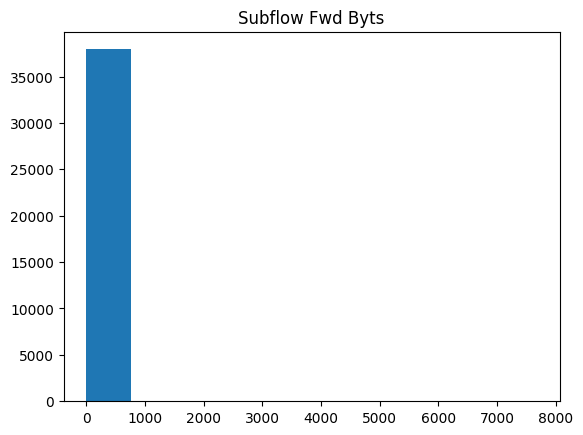

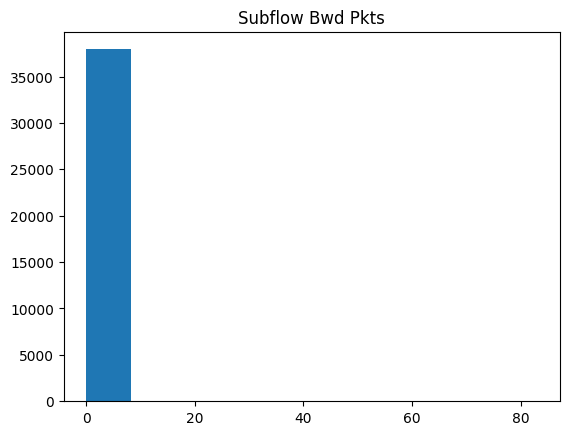

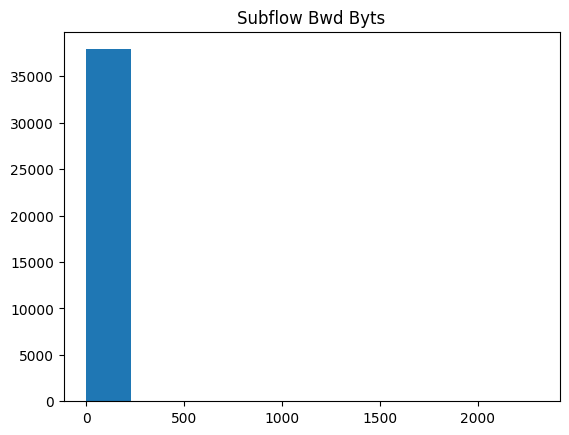

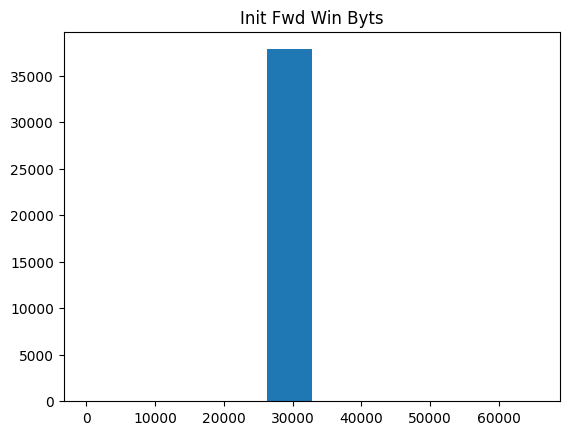

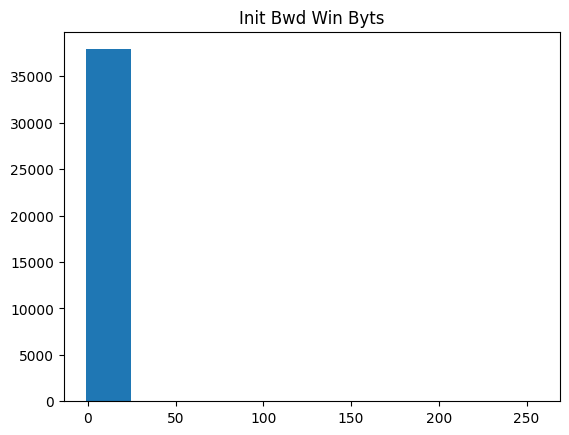

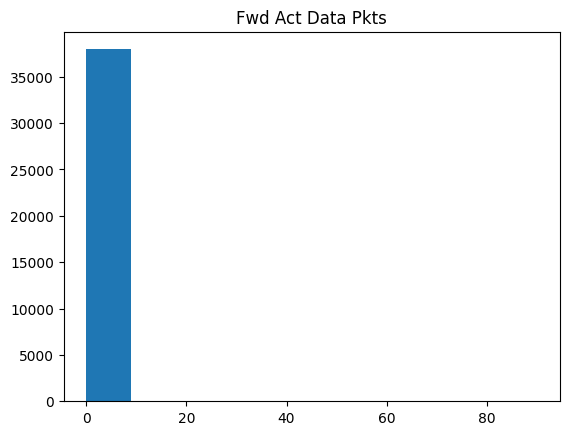

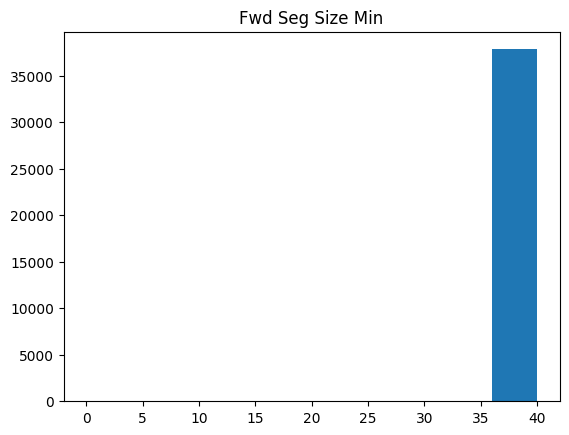

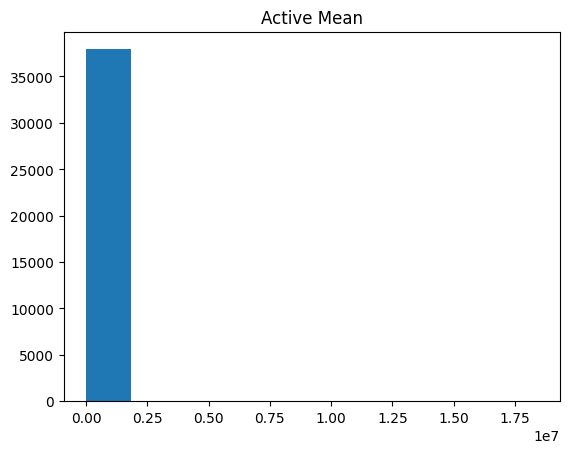

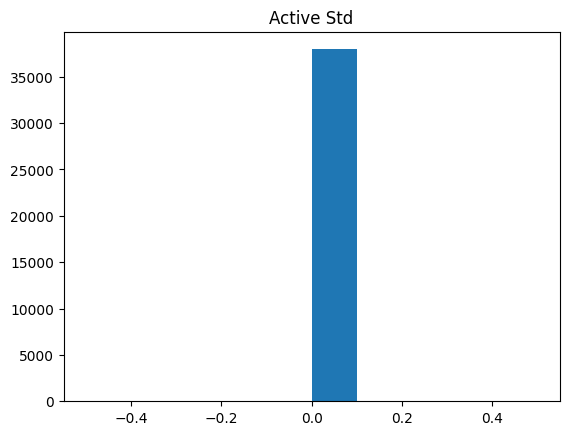

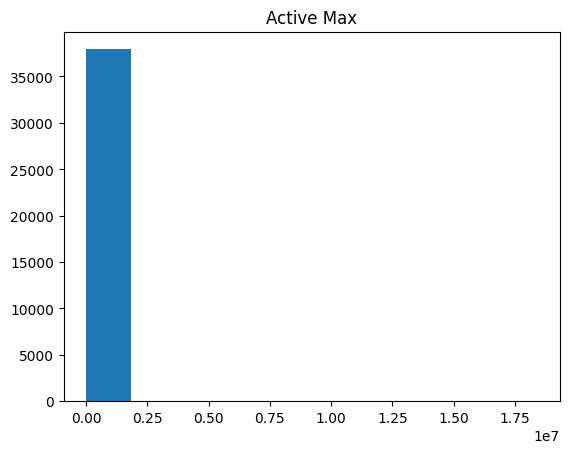

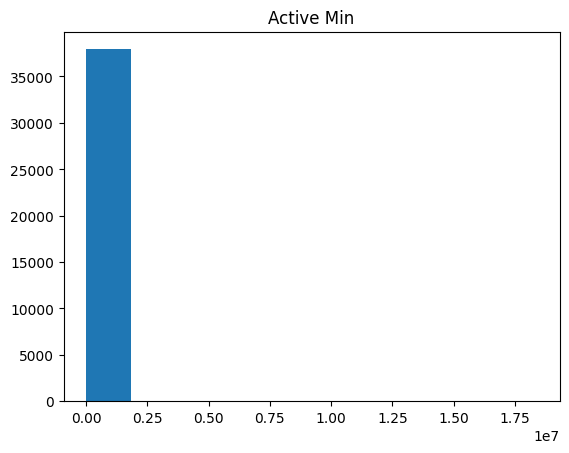

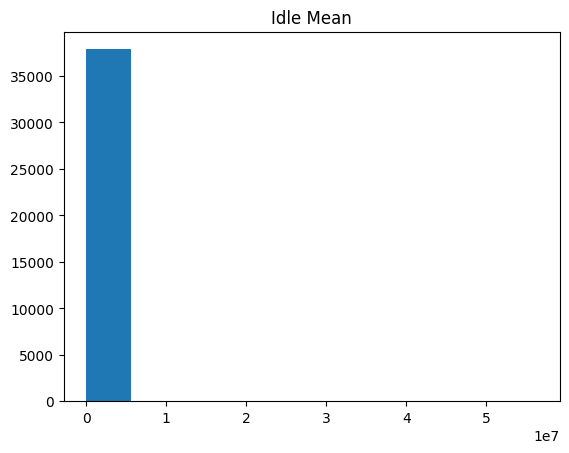

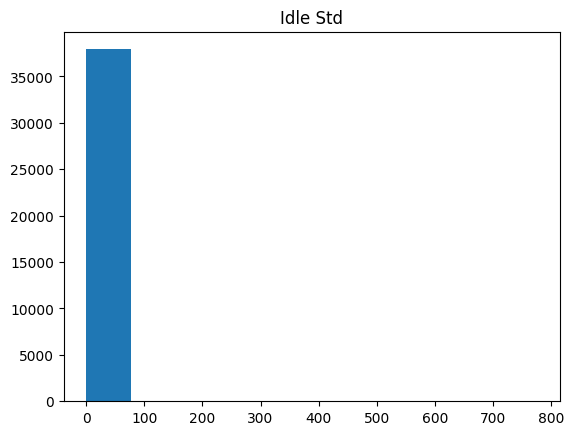

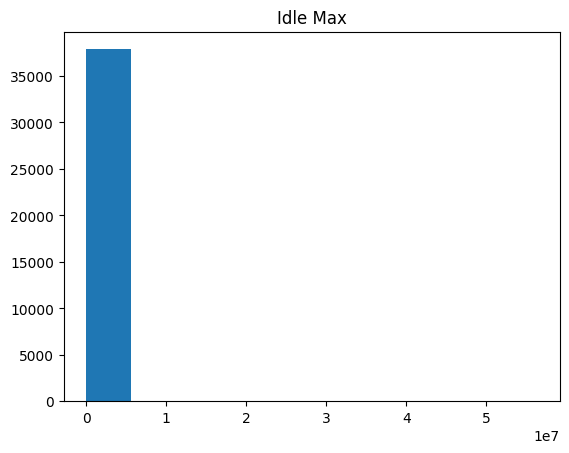

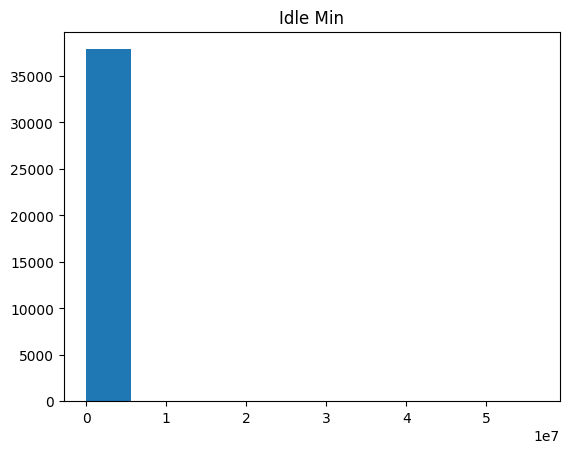

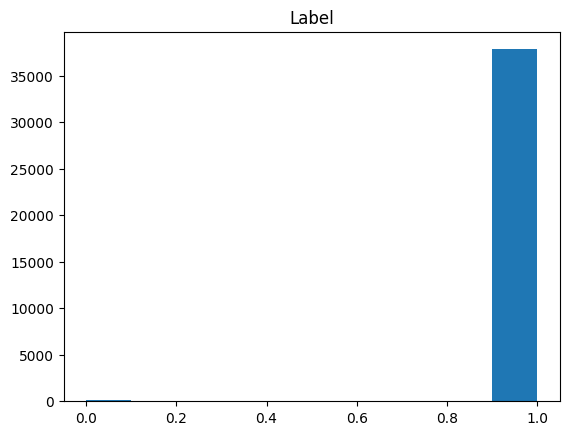

In [14]:
plt.figure(5)
for col in data_f.columns:
  plt.hist(data_f[col])
  plt.title(col)
  plt.show()

In [16]:
X = data_f.drop('Label', axis=1)
Y = data_f['Label']
X_train, Y_train, X_test, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [17]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (26562, 79)
The test dataset size =  (26562,)


Training the model

In [20]:
!pip install pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ... (your existing code to load and prepare data_f) ...

# Assuming the column with the date/time string is named 'Timestamp'
# Replace 'Timestamp' with the actual column name if it's different
data_f['Timestamp'] = pd.to_datetime(data_f['Timestamp'])

# Option 1: Extract numerical features from the datetime object
data_f['Hour'] = data_f['Timestamp'].dt.hour
data_f['Day'] = data_f['Timestamp'].dt.day
data_f['Month'] = data_f['Timestamp'].dt.month
# ... extract other relevant features ...

# Option 2: Calculate time difference from a reference point
# For example, calculate the time difference in seconds from the first timestamp
reference_time = data_f['Timestamp'].min()
data_f['TimeDiff'] = (data_f['Timestamp'] - reference_time).dt.total_seconds()

# Drop the original 'Timestamp' column
data_f = data_f.drop('Timestamp', axis=1)

# Now proceed with splitting and model training
X = data_f.drop('Label', axis=1)
Y = data_f['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)  # Corrected split

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

<ipython-input-20-042e30cf2cee>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_f['Timestamp'] = pd.to_datetime(data_f['Timestamp'])
<ipython-input-20-042e30cf2cee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Timestamp'] = pd.to_datetime(data_f['Timestamp'])
<ipython-input-20-042e30cf2cee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Hour'] = data_f[

In [21]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

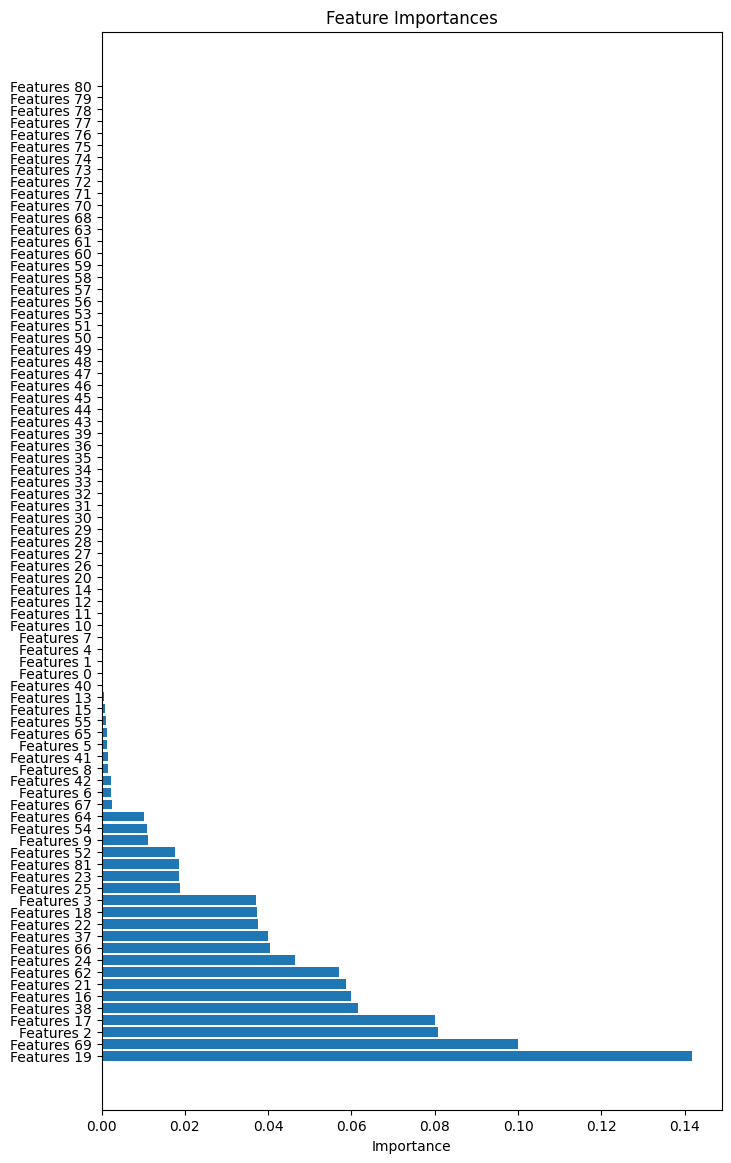

In [26]:
importances = rf_model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
feature_names = [f"Features {i}" for i in indices]

plt.figure(figsize=(8,14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

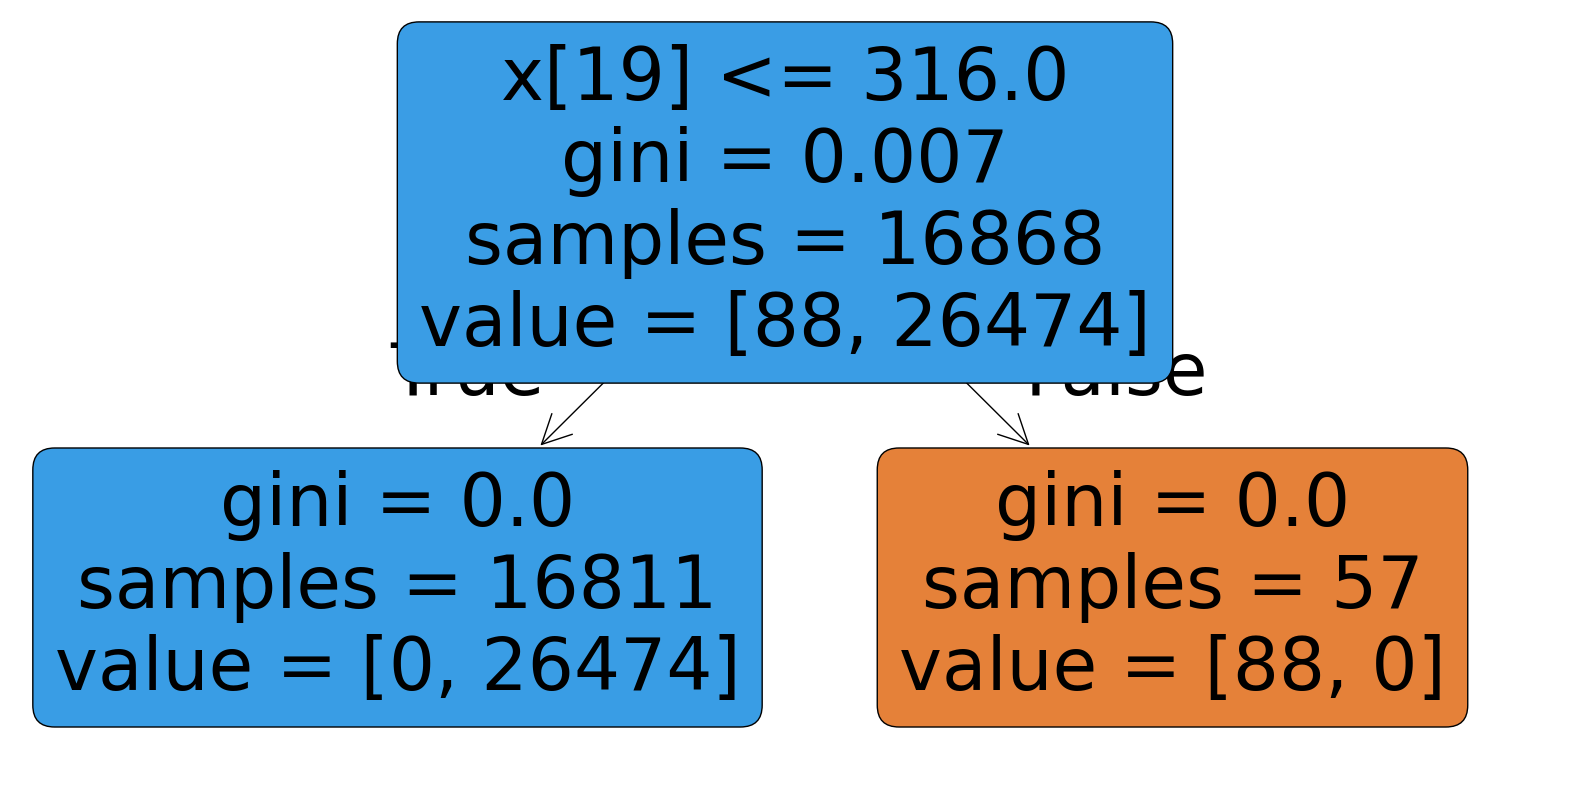

In [28]:
from sklearn.tree import plot_tree
estimator = rf_model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

Model Evaluation

In [29]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [30]:
rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred)
rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)

print('\nRandom Forest Metrics :')
print(f'Accuracy:{rf_accuracy:4f}')
print(f'F1 Score:{rf_f1:4f}')
print(f'Precision:{rf_precision:4f}')
print(f'Recall : {rf_recall:4f}')


Random Forest Metrics :
Accuracy:1.000000
F1 Score:1.000000
Precision:1.000000
Recall : 1.000000


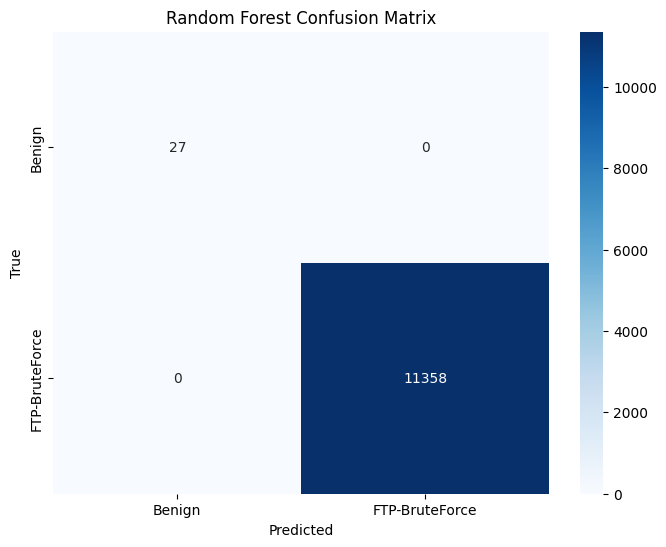

In [31]:
plot_confusion_matrix(Y_test, rf_pred, ['Benign', 'FTP-BruteForce'], 'Random Forest Confusion Matrix')

Deep Neural Network

In [33]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, Y_train)
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
nn_accuracy = accuracy_score(Y_test, nn_pred)
nn_f1 = f1_score(Y_test, nn_pred)
nn_precision = precision_score(Y_test, nn_pred)
nn_recall = recall_score(Y_test, nn_pred)

print('\nNeural Network Metrics :')
print(f'Accuracy:{nn_accuracy:4f}')
print(f'F1 Score:{nn_f1:4f}')
print(f'Precision:{nn_precision:4f}')
print(f'Recall : {nn_recall:4f}')


Neural Network Metrics :
Accuracy:1.000000
F1 Score:1.000000
Precision:1.000000
Recall : 1.000000


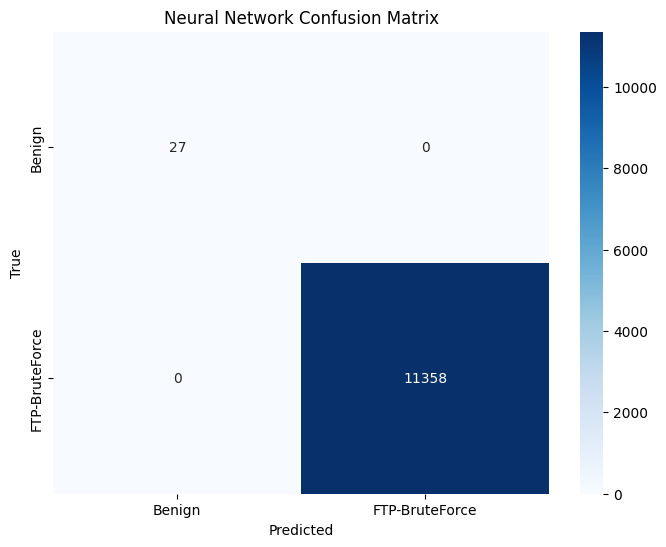

In [37]:
plot_confusion_matrix(Y_test, rf_pred, ['Benign', 'FTP-BruteForce'], 'Neural Network Confusion Matrix')

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset (replace 'your_dataset.csv' with your file)
data = pd.read_csv("/content/02-14-2018.csv")

# Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # Handle columns with invalid strings
            if column == 'datetime_column':  # Replace with the actual datetime column name if present
                data[column] = pd.to_datetime(data[column])  # Convert to datetime
                data[column] = data[column].apply(lambda x: x.timestamp())  # Convert to numerical timestamp
            else:
                # For other non-numeric columns, use label encoding or drop
                print(f"Non-numeric values detected in column '{column}', applying label encoding.")
                label_encoder = LabelEncoder()
                data[column] = label_encoder.fit_transform(data[column].astype(str))

# Drop irrelevant columns (e.g., IDs, names, etc.)
if 'irrelevant_column' in data.columns:  # Replace 'irrelevant_column' with actual column names
    data = data.drop(columns=['irrelevant_column'])

# Replace `inf` or `-inf` with `NaN`
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (NaN) - replace with column mean (or median, depending on preference)
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for RNN (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])  # Assuming 1 timestep

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target to categorical if multi-class classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Label', applying label encoding.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9968 - loss: 0.0222 - val_accuracy: 0.9999 - val_loss: 4.3485e-04
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 1.0000 - loss: 2.9201e-04 - val_accuracy: 0.9999 - val_loss: 4.7100e-04
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 1.0000 - loss: 1.5743e-04 - val_accuracy: 0.9999 - val_loss: 3.1162e-04
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 1.0000 - loss: 1.5100e-04 - val_accuracy: 1.0000 - val_loss: 2.3505e-04
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.9999 - loss: 1.8882e-04 - val_accuracy: 1.0000 - val_loss: 1.9335e-04
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 1.0000 - loss: 1.7233e-04 - val_accuracy: 1.0000 - val_loss: 1.2602e-04
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 1.0000 - loss: 1.0926e-04 - val_accuracy: 1.0000 - val_loss: 1.6020e-04
Epoch 8/10
20972/

Dataset2

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv("/content/02-16-2018.csv")

# Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # Handle specific datetime column
            if column == 'Timestamp':  # Replace with the actual datetime column name
                data[column] = pd.to_datetime(data[column], format='%d/%m/%Y %H:%M:%S', errors='coerce')
                data[column] = data[column].apply(lambda x: x.timestamp() if pd.notna(x) else np.nan)
            else:
                # For other non-numeric columns, use label encoding
                print(f"Non-numeric values detected in column '{column}', applying label encoding.")
                label_encoder = LabelEncoder()
                data[column] = label_encoder.fit_transform(data[column].astype(str))

# Replace `inf` or `-inf` with `NaN`
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (NaN) - replace with column mean
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Encode target labels if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize numerical features (apply scaler before reshaping)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for RNN (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])  # Assuming 1 timestep

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target to categorical if multi-class classification
num_classes = len(np.unique(y))  # Determine the number of classes
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))  # Dynamically set output layer units

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


<ipython-input-53-5851a9883ec6>:10: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/02-16-2018.csv")


Non-numeric values detected in column 'Dst Port', applying label encoding.
Non-numeric values detected in column 'Protocol', applying label encoding.
Non-numeric values detected in column 'Flow Duration', applying label encoding.
Non-numeric values detected in column 'Tot Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'Tot Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Min', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Mean', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Std', applying label encoding.
Non-numeric values detected in column 'Bwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9961 - loss: 0.0276 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 5.7825e-05
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 144s 4ms/step - accuracy: 0.9999 - loss: 5.9665e-04 - val_accuracy: 1.0000 - val_loss: 2.4126e-05
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 1.0000 - loss: 1.5013e-04 - val_accuracy: 1.0000 - val_loss: 1.7578e-07
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 1.0000 - loss: 1.9078e-04 - val_accuracy: 1.0000 - val_loss: 5.1402e-07
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy: 1.0000 - loss: 2.5838e-04 - val_accuracy: 1.0000 - val_loss: 7.0036e-08
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 137s 4ms/step - accuracy: 1.0000 - loss: 2.0184e-04 - val_accuracy: 1.0000 - val_loss: 1.0723e-07
Epoch 8/10
20972/2097